In [1]:
library(tidyverse)
library(caret)
library(cowplot)
library(tree)
library(rgl)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Registered S3 method overwritten by 'tree':
  method     from
  print.tree cli 

This build of rgl does not include OpenGL functions.  Use
 rglwidget() to display results, e.g. via options(rgl.printRglwidget = TRUE).



In [2]:
sky_data <- read_csv("Skyserver.csv")


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  objid = col_double(),
  ra = col_double(),
  dec = col_double(),
  u = col_double(),
  g = col_double(),
  r = col_double(),
  i = col_double(),
  z = col_double(),
  run = col_double(),
  rerun = col_double(),
  camcol = col_double(),
  field = col_double(),
  specobjid = col_double(),
  class = col_character(),
  redshift = col_double(),
  plate = col_double(),
  mjd = col_double(),
  fiberid = col_double()
)




In [3]:
sky_data %>% head()
sky_data %>% summary()

objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1.23765e+18,183.5313,0.08969303,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.72236e+18,STAR,-0.000008960,3306,54922,491
1.23765e+18,183.5984,0.13528503,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.63814e+17,STAR,-0.000054900,323,51615,541
1.23765e+18,183.6802,0.12618509,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.23274e+17,GALAXY,0.123111200,287,52023,513
1.23765e+18,183.8705,0.04991069,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.72237e+18,STAR,-0.000110616,3306,54922,510
1.23765e+18,183.8833,0.10255675,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.72237e+18,STAR,0.000590357,3306,54922,512
1.23765e+18,183.8472,0.17369416,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.64955e+17,STAR,0.000314603,324,51666,594


     objid                 ra               dec                u        
 Min.   :1.238e+18   Min.   :  8.235   Min.   :-5.3826   Min.   :12.99  
 1st Qu.:1.238e+18   1st Qu.:157.371   1st Qu.:-0.5390   1st Qu.:18.18  
 Median :1.238e+18   Median :180.395   Median : 0.4042   Median :18.85  
 Mean   :1.238e+18   Mean   :175.530   Mean   :14.8361   Mean   :18.62  
 3rd Qu.:1.238e+18   3rd Qu.:201.547   3rd Qu.:35.6494   3rd Qu.:19.26  
 Max.   :1.238e+18   Max.   :260.884   Max.   :68.5423   Max.   :19.60  
       g               r               i               z              run      
 Min.   :12.80   Min.   :12.43   Min.   :11.95   Min.   :11.61   Min.   : 308  
 1st Qu.:16.82   1st Qu.:16.17   1st Qu.:15.85   1st Qu.:15.62   1st Qu.: 752  
 Median :17.50   Median :16.86   Median :16.55   Median :16.39   Median : 756  
 Mean   :17.37   Mean   :16.84   Mean   :16.58   Mean   :16.42   Mean   : 981  
 3rd Qu.:18.01   3rd Qu.:17.51   3rd Qu.:17.26   3rd Qu.:17.14   3rd Qu.:1331  
 Max.   :

In [4]:
sky_data %>% filter(class == "STAR") %>% nrow()

[1] 4152

In [5]:
unique(sky_data$class)

combos <- combn(c("u","g", "r", "i", "z"), 2)

print(combos)
combos[[4]]

[1] "STAR"   "GALAXY" "QSO"

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
[1,] "u"  "u"  "u"  "u"  "g"  "g"  "g"  "r"  "r"  "i"  
[2,] "g"  "r"  "i"  "z"  "r"  "i"  "z"  "i"  "z"  "z"  


[1] "r"

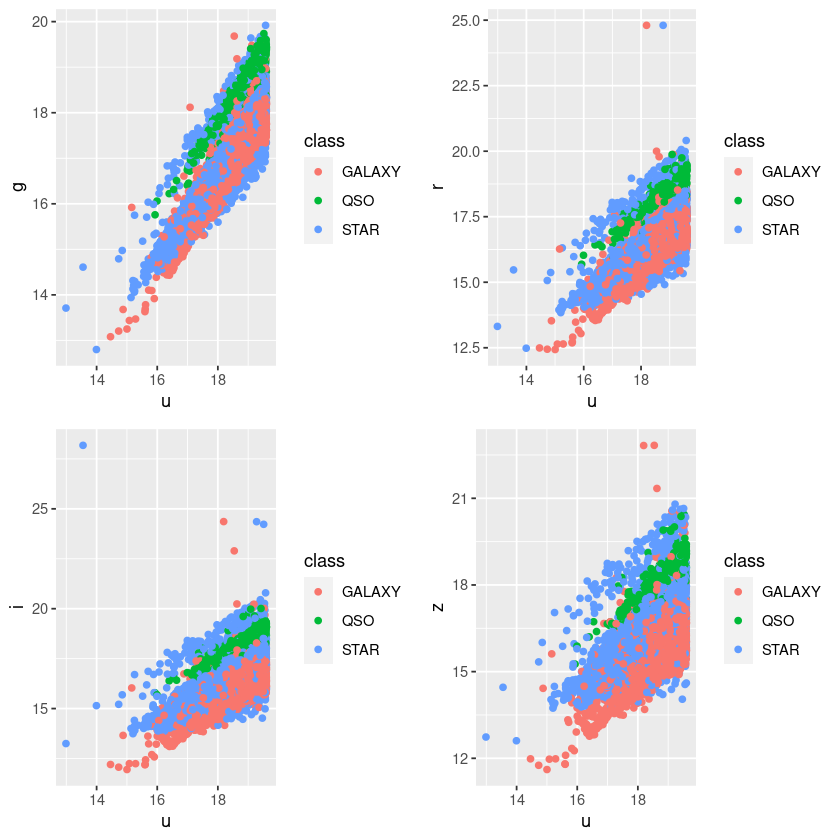

In [6]:
p1 <- sky_data %>% ggplot(aes(x = u, y = g, col = class)) + geom_point()
p2 <- sky_data %>% ggplot(aes(x = u, y = r, col = class)) + geom_point()
p3 <- sky_data %>% ggplot(aes(x = u, y = i, col = class)) + geom_point()
p4 <- sky_data %>% ggplot(aes(x = u, y = z, col = class)) + geom_point()
plot_grid(p1,p2,p3,p4)

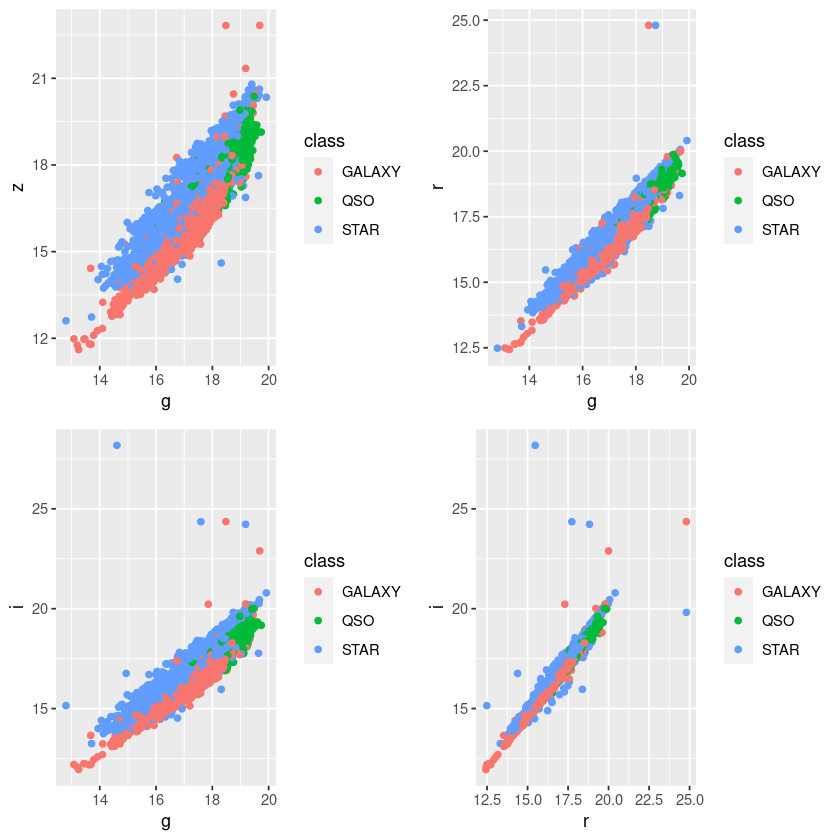

In [7]:
p1 <- sky_data %>% ggplot(aes(x = g, y = z, col = class)) + geom_point()
p2 <- sky_data %>% ggplot(aes(x = g, y = r, col = class)) + geom_point()
p3 <- sky_data %>% ggplot(aes(x = g, y = i, col = class)) + geom_point()
p4 <- sky_data %>% ggplot(aes(x = r, y = i, col = class)) + geom_point()
plot_grid(p1,p2,p3,p4)

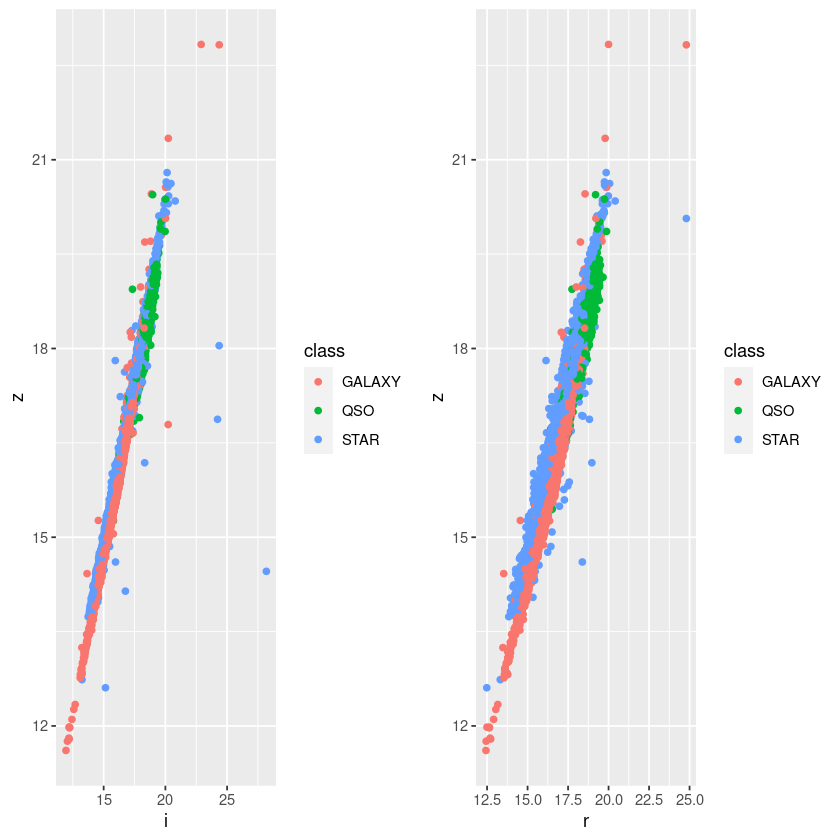

In [8]:
p1 <- sky_data %>% ggplot(aes(x = i, y = z, col = class)) + geom_point()
p2 <- sky_data %>% ggplot(aes(x = r, y = z, col = class)) + geom_point()
plot_grid(p1,p2)

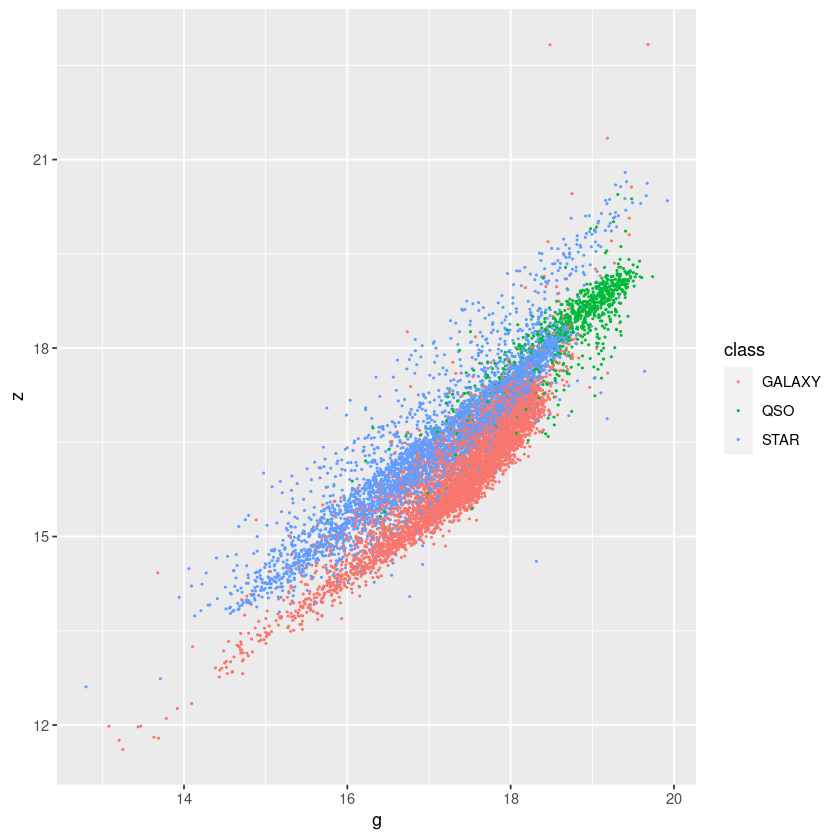

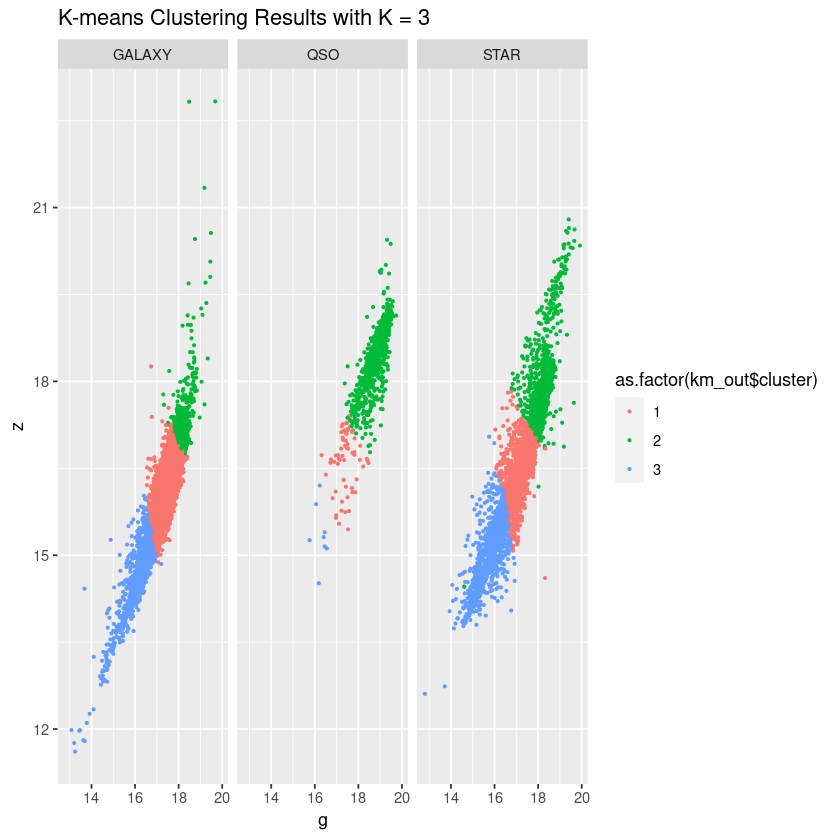

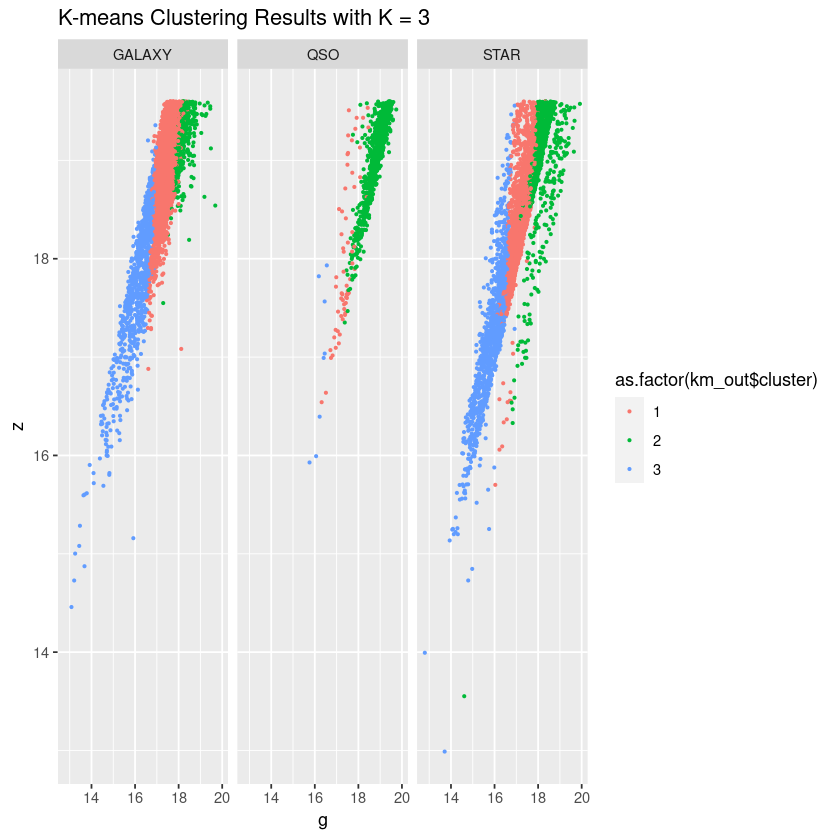

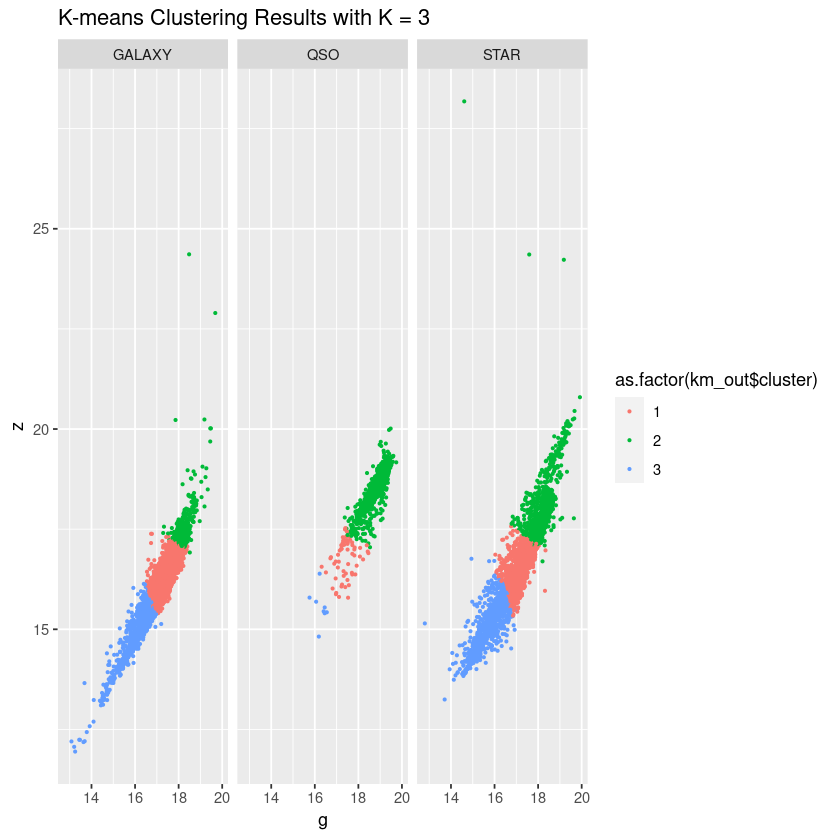

In [9]:
sky_data %>% ggplot(aes(x = g, y = z, col = class)) + geom_point(shape = 20, size = 0.5)

km_out <- sky_data %>% select(u, g, r, i, z) %>% kmeans(3, nstart = 20)

ggplot(data = sky_data, aes(x = g, y = z, col = as.factor(km_out$cluster))) + geom_point(size = 0.5) +
       labs(title = "K-means Clustering Results with K = 3") +
       xlab("g") + ylab("z") + facet_grid( ~ class)

ggplot(data = sky_data, aes(x = g, y = u, col = as.factor(km_out$cluster))) + geom_point(size = 0.5) +
       labs(title = "K-means Clustering Results with K = 3") +
       xlab("g") + ylab("z") + facet_grid( ~ class)

ggplot(data = sky_data, aes(x = g, y = i, col = as.factor(km_out$cluster))) + geom_point(size = 0.5) +
       labs(title = "K-means Clustering Results with K = 3") +
       xlab("g") + ylab("z") + facet_grid( ~ class)

In [10]:
sky_colors <- c("blue", "red", "green")
colors3D <- sky_colors[as.factor(sky_data$class)]

plot3d(x = sky_data$g, y = sky_data$z, z = sky_data$redshift, col = colors3D, type = 's', radius = .1)

htmlwidgets::saveWidget(rglwidget(width = 520, height = 520), 
                        file = "3dscatter.html",
                        libdir = "libs",
                        selfcontained = FALSE
                        )

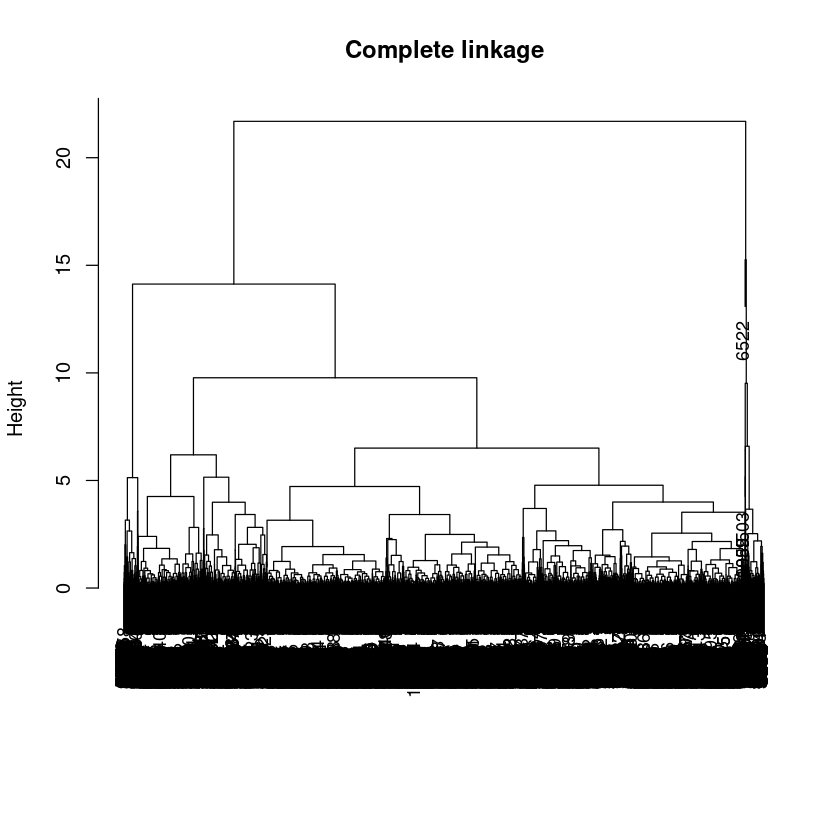

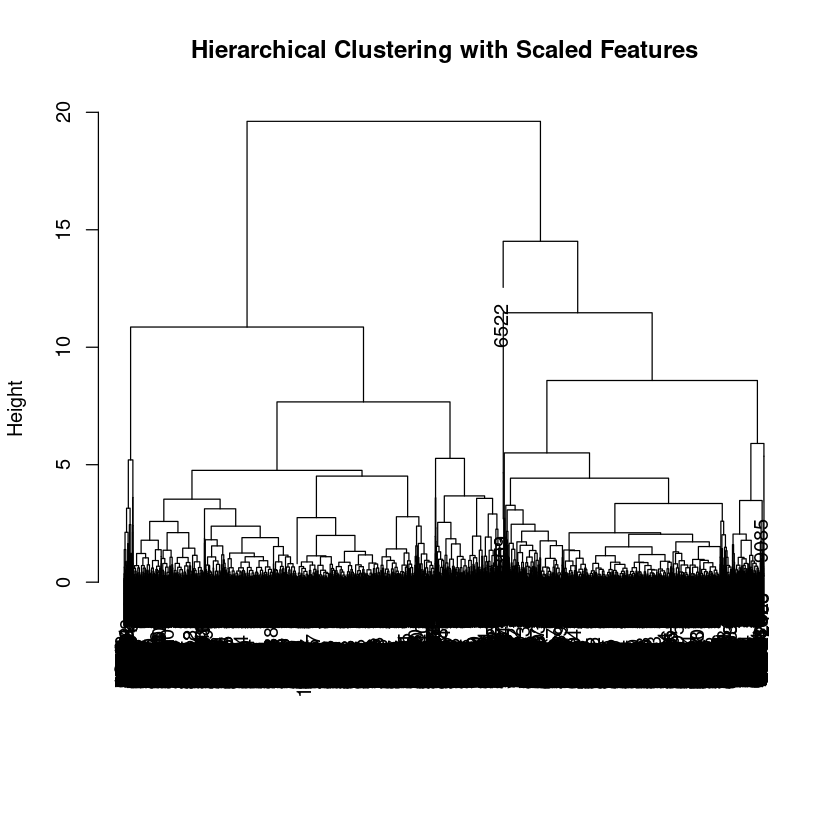

In [11]:
hc.complete <- hclust(dist(sky_data[, 4:8]), method = "complete")
plot(hc.complete, main = "Complete linkage", cex = 0.9, xlab = "", sub = "")

sky_sc <- scale(sky_data[, 4:8])

plot(hclust(dist(sky_sc), method = "complete"), main = "Hierarchical Clustering with Scaled Features", xlab = "", sub = "")

In [12]:
set.seed(1)
training <-sample(1:nrow(sky_data), size = nrow(sky_data) * 0.5)
testing <- dplyr::setdiff(1:nrow(sky_data), training)
skyTrain <- sky_data[training, ]
skyTest <- sky_data[testing, ]

str(skyTrain)
# Predictor information here https://www.sdss.org/dr12/algorithms/magnitudes/

tibble [5,000 × 18] (S3: tbl_df/tbl/data.frame)
 $ objid    : num [1:5000] 1.24e+18 1.24e+18 1.24e+18 1.24e+18 1.24e+18 ...
 $ ra       : num [1:5000] 149.3 184.7 182.5 166.2 16.1 ...
 $ dec      : num [1:5000] 0.22 -0.376 -3.531 0.283 14.504 ...
 $ u        : num [1:5000] 18.4 18.9 19.3 17.8 18 ...
 $ g        : num [1:5000] 17 18.8 18.1 16.9 16.1 ...
 $ r        : num [1:5000] 16.4 18.6 17.5 16.6 15.2 ...
 $ i        : num [1:5000] 16.1 18.4 17.2 16.5 14.8 ...
 $ z        : num [1:5000] 15.9 18.3 17 16.4 14.5 ...
 $ run      : num [1:5000] 756 752 1140 756 1035 ...
 $ rerun    : num [1:5000] 301 301 301 301 301 301 301 301 301 301 ...
 $ camcol   : num [1:5000] 4 3 1 4 3 3 6 2 4 1 ...
 $ field    : num [1:5000] 224 275 197 336 69 333 34 481 213 357 ...
 $ specobjid: num [1:5000] 3.23e+18 3.24e+17 3.74e+17 4.32e+18 4.74e+17 ...
 $ class    : chr [1:5000] "STAR" "QSO" "GALAXY" "STAR" ...
 $ redshift : num [1:5000] 0.000102 1.516544 0.099229 0.00058 0.040923 ...
 $ plate    : num [1:500

In [13]:
trctrl <- trainControl(method = "repeatedcv", 
                       number = 10, 
                       repeats = 3)

set.seed(2020)

knn_fit1 <- train(class ~ u + g + r + i + z + redshift, 
                 data = skyTrain,
                 method = "knn", 
                 trControl = trctrl, 
                 preProcess = c("center", "scale"), 
                 tuneGrid = data.frame(k = 2:30))

In [14]:
knn_fit1

k-Nearest Neighbors 

5000 samples
   6 predictor
   3 classes: 'GALAXY', 'QSO', 'STAR' 

Pre-processing: centered (6), scaled (6) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 4500, 4499, 4500, 4501, 4500, 4499, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   2  0.9501986  0.9123284
   3  0.9566658  0.9237077
   4  0.9536647  0.9184064
   5  0.9530651  0.9173971
   6  0.9497311  0.9115328
   7  0.9473979  0.9074437
   8  0.9449963  0.9032144
   9  0.9445958  0.9024932
  10  0.9425940  0.8989515
  11  0.9409276  0.8959913
  12  0.9394623  0.8934009
  13  0.9374616  0.8898512
  14  0.9345947  0.8848066
  15  0.9323951  0.8809546
  16  0.9305953  0.8777671
  17  0.9287948  0.8745921
  18  0.9274612  0.8722626
  19  0.9262615  0.8701314
  20  0.9252613  0.8683908
  21  0.9235951  0.8654101
  22  0.9208612  0.8605380
  23  0.9195276  0.8582008
  24  0.9178615  0.8552523
  25  0.9167953  0.8533090
  26  0.9151951  0.85046

[1] "The knn misclassification rate is 0.039"

objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid,knnPred,misclass
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
1.23765e+18,183.5313,0.08969303,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.72236e+18,STAR,-0.000008960,3306,54922,491,STAR,TRUE
1.23765e+18,183.5984,0.13528503,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.63814e+17,STAR,-0.000054900,323,51615,541,STAR,TRUE
1.23765e+18,183.6802,0.12618509,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.23274e+17,GALAXY,0.123111200,287,52023,513,GALAXY,TRUE
1.23765e+18,183.8833,0.10255675,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.72237e+18,STAR,0.000590357,3306,54922,512,STAR,TRUE
1.23765e+18,183.9001,0.18747330,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.72237e+18,STAR,0.000314848,3306,54922,515,STAR,TRUE
1.23765e+18,183.9246,0.09724578,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.63829e+17,STAR,0.000089100,323,51615,595,STAR,TRUE


         
knn_pred1 GALAXY  QSO STAR
   GALAXY   2300   23   32
   QSO        10  414    1
   STAR      127    1 2092

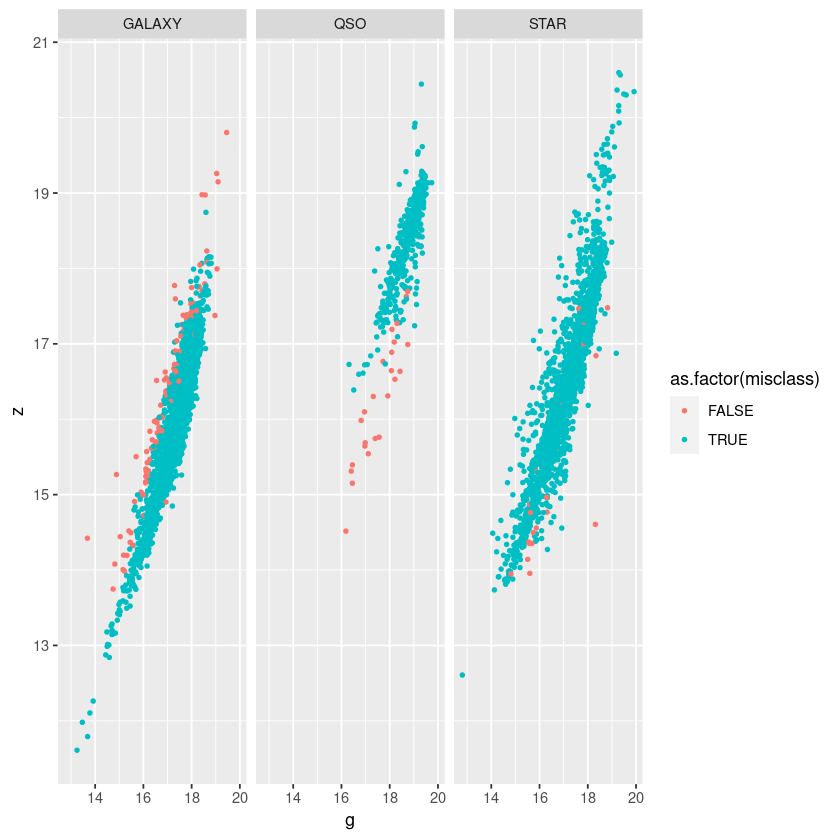

In [15]:
set.seed(1)
knn_pred1 <- predict(knn_fit1, newdata = skyTest)

knn_misclass <- sum(knn_pred1 != skyTest$class)/nrow(skyTest)

sprintf("The knn misclassification rate is %0.3f" , knn_misclass)

skyTest2 <- skyTest %>% select(everything()) %>% mutate(knnPred = knn_pred1, misclass = knnPred == class)
head(skyTest2)

skyTest2 %>% ggplot(aes(x = g, y = z, col = as.factor(misclass))) + geom_point(shape = 20) + facet_grid( ~ class)

table(knn_pred1, skyTest$class)

CART 

5000 samples
   6 predictor
   3 classes: 'GALAXY', 'QSO', 'STAR' 

Pre-processing: centered (6), scaled (6) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 4500, 4499, 4501, 4499, 4500, 4500, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa    
  0.00  0.9897333  0.9818582
  0.01  0.9871342  0.9772528
  0.02  0.9871342  0.9772528
  0.03  0.9871342  0.9772528
  0.04  0.9871342  0.9772528
  0.05  0.9871342  0.9772528
  0.06  0.9871342  0.9772528
  0.07  0.9871342  0.9772528
  0.08  0.9871342  0.9772528
  0.09  0.9871342  0.9772528
  0.10  0.9871342  0.9772528
  0.11  0.9871342  0.9772528
  0.12  0.9871342  0.9772528
  0.13  0.9871342  0.9772528
  0.14  0.9871342  0.9772528
  0.15  0.9817342  0.9670527
  0.16  0.9138019  0.8377789
  0.17  0.9138019  0.8377789
  0.18  0.9138019  0.8377789
  0.19  0.9138019  0.8377789
  0.20  0.9138019  0.8377789
  0.21  0.9138019  0.8377789
  0.22  0.9138019  0.8377789
  0.23  0.9138019 

[1] 0.01




|       | GALAXY| QSO| STAR|
|:------|------:|---:|----:|
|GALAXY |   2419|  28|    4|
|QSO    |     16| 410|    0|
|STAR   |      2|   0| 2121|

[1] 4950

[1] "The tree misclassification rate is 0.010"

[1] "The total correct predictions are 4950"

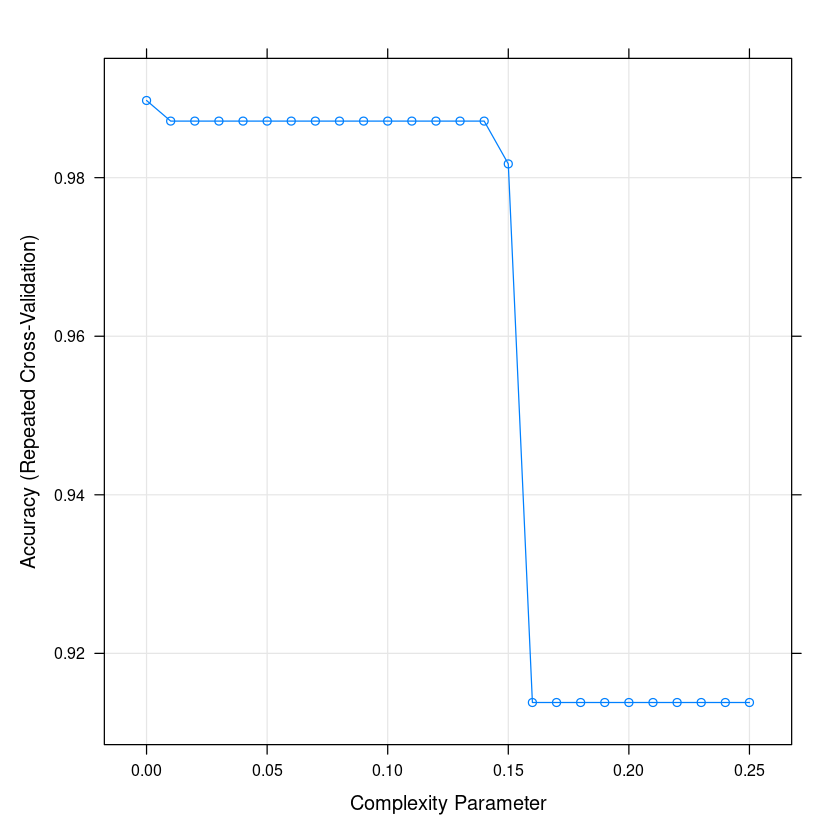

In [16]:
set.seed(1)

tree_fit <- train(class ~ u + g + r + i + z + redshift, 
                  data = skyTrain,
                  method = "rpart", 
                  trControl = trctrl, 
                  preProcess = c("center", "scale"),
                  tuneGrid = data.frame(cp = seq(0,0.25,0.01)))

tree_fit
plot(tree_fit)

tree_pred <- predict(tree_fit, newdata = skyTest)

tree_misclass <- sum(tree_pred != skyTest$class) / nrow(skyTest)

print(tree_misclass)

tree_con_tab <- table(tree_pred, skyTest$class)

knitr::kable(tree_con_tab)

sum(diag(tree_con_tab))

tree_misclass <- sum(tree_pred != skyTest$class) / nrow(skyTest)

sprintf("The tree misclassification rate is %0.3f" , tree_misclass)

sprintf("The total correct predictions are %d", sum(diag(tree_con_tab)))

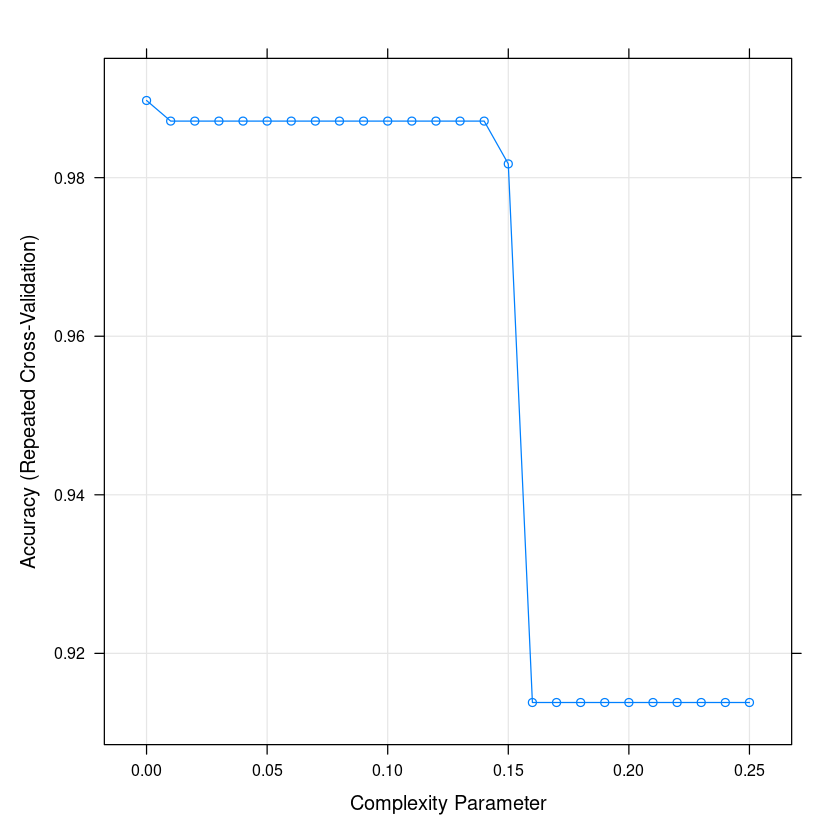

In [17]:
plot(tree_fit)



|       | GALAXY| QSO| STAR|
|:------|------:|---:|----:|
|GALAXY |   2417|  32|    2|
|QSO    |     12| 406|    0|
|STAR   |      8|   0| 2123|

[1] "The misclassification rate is 0.011"

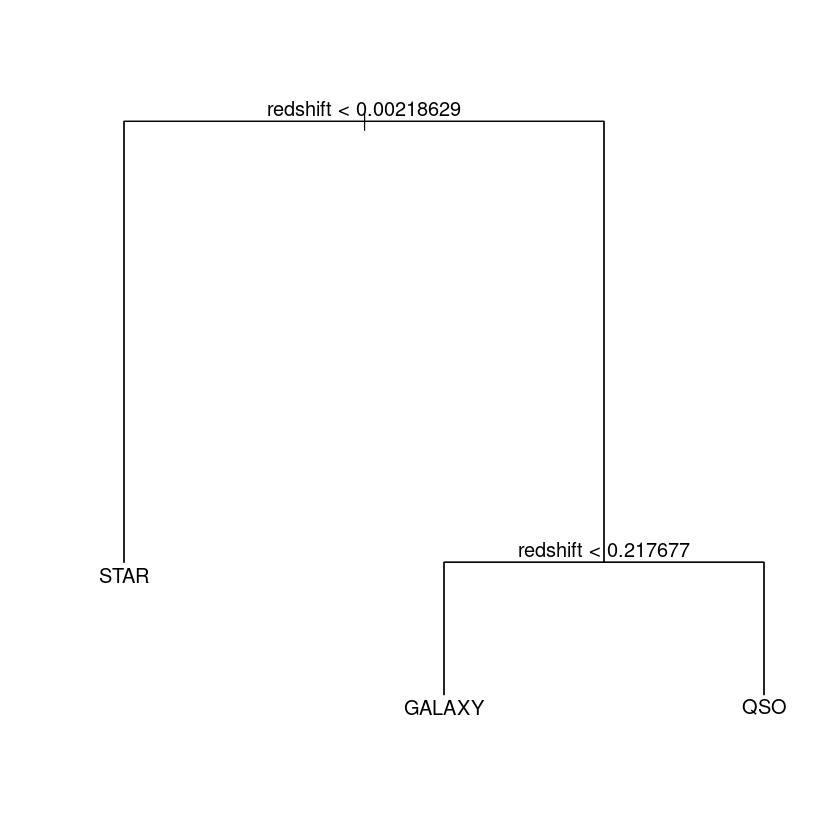

In [18]:
set.seed(2020)

sky_tree <- tree(as.factor(class) ~ u + g + r + i + z + redshift, data = skyTrain)

skyTree_pred <- predict(sky_tree, newdata = skyTest, type = 'class')

sky_tree_con_tab <- table(skyTree_pred, skyTest$class)
knitr::kable(sky_tree_con_tab)

misclass <- 1 - sum(diag(sky_tree_con_tab))/nrow(skyTest)

sprintf("The misclassification rate is %0.3f", misclass)

plot(sky_tree)
text(sky_tree)

In [19]:
cv_skyTree <- cv.tree(sky_tree, FUN = prune.misclass)

$size
[1] 3 2 1

$dev
[1]   67  434 2439

$k
[1] -Inf  370 2010

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

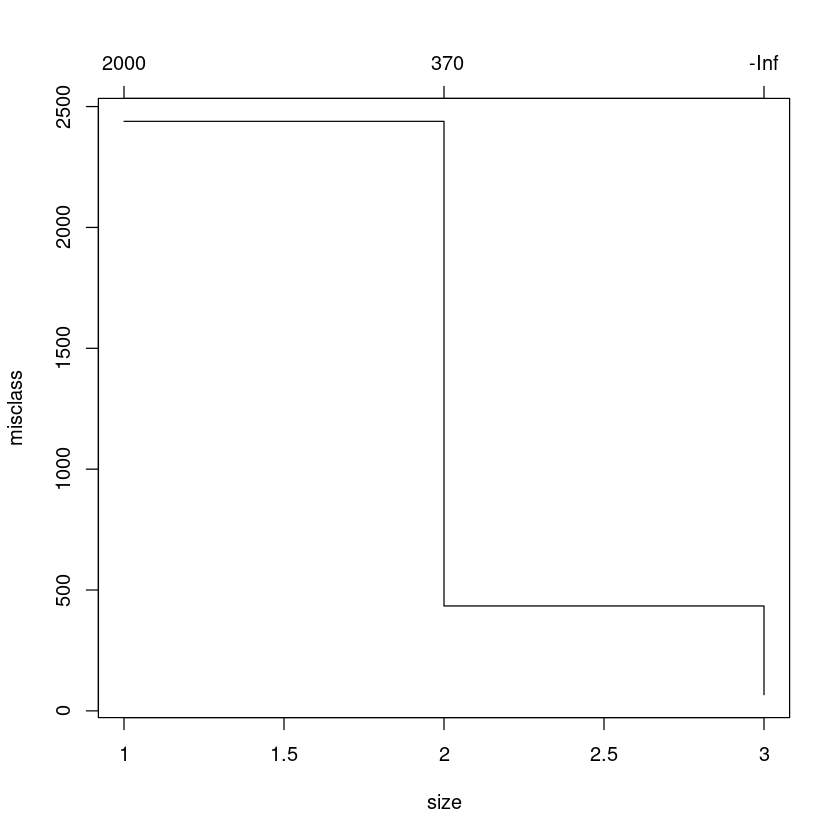

In [20]:
cv_skyTree
plot(cv_skyTree)

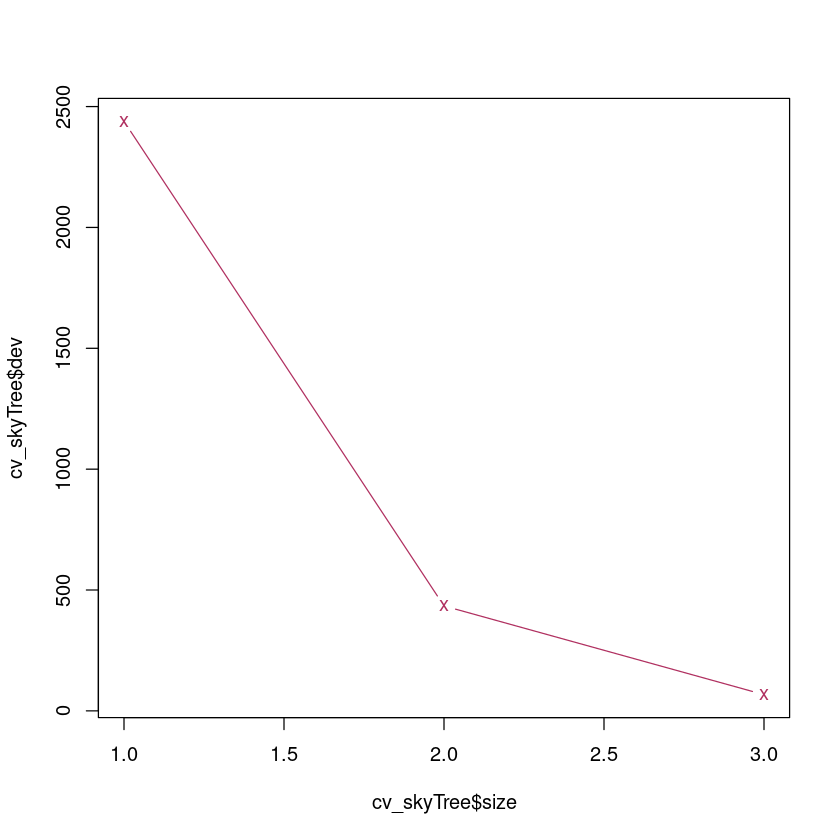

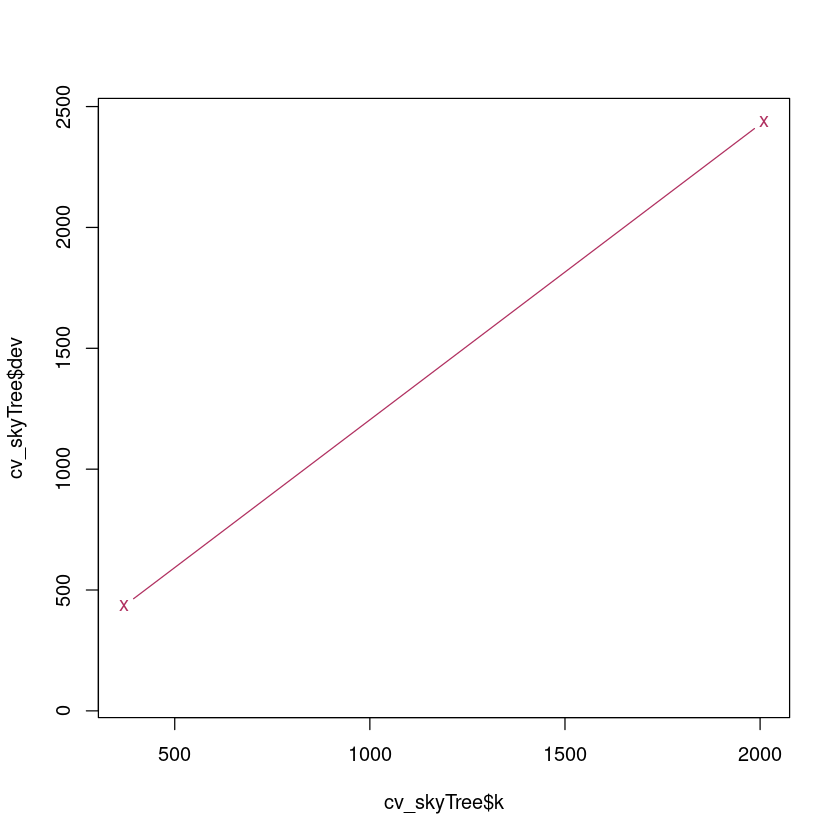

In [21]:
plot(cv_skyTree$size, cv_skyTree$dev, type = "b", col = "maroon", pch = 'x')
plot(cv_skyTree$k, cv_skyTree$dev, type = "b", col = "maroon", pch = 'x')

In [22]:
day_list <- c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")

output_file <- rep(NA, 7)
params_list <- rep(NA, 7)

for(i in 1:7){
    output_file[i] <- paste0(day_list[i], ".md")
}

print(output_file)

test_tibble <- as_tibble(cbind(output_file, day_list))

print(test_tibble)

[1] "Sunday.md"    "Monday.md"    "Tuesday.md"   "Wednesday.md" "Thursday.md" 
[6] "Friday.md"    "Saturday.md" 
# A tibble: 7 x 2
  output_file  day_list 
  <chr>        <chr>    
1 Sunday.md    Sunday   
2 Monday.md    Monday   
3 Tuesday.md   Tuesday  
4 Wednesday.md Wednesday
5 Thursday.md  Thursday 
6 Friday.md    Friday   
7 Saturday.md  Saturday 
